## Building the Logistic Regression

Below, the necessary libraries are imported and data uploaded.a

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [21]:
train_df = pd.read_csv("../data/train.csv")
val_df = pd.read_csv("../data/validation.csv")
test_df = pd.read_csv("../data/test.csv")

Below, the Logistic Regression Model is built. Important to note: the vectorizer accounts for bi-grams. The goal is to keep the model simple, but accounting for bi-grams will improve robustness and better account for some of the unique word combinations that might be found in the data. The model yields a F1 Score = 0.698, Precision = 0.665, and Recall = 0.733.

In [22]:
lr = make_pipeline(CountVectorizer(analyzer='word', ngram_range=(1, 2)), LogisticRegression())
lr.fit(train_df["Stemmed"], train_df["Result_Bin"])

# Predict on the test set
y_pred = lr.predict(val_df["Stemmed"])
y_val = val_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_val, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_val, y_pred)
print("Precision:", round(precision, 3))
# Calculate recall
recall = recall_score(y_val, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.698
Precision: 0.665
Recall: 0.733


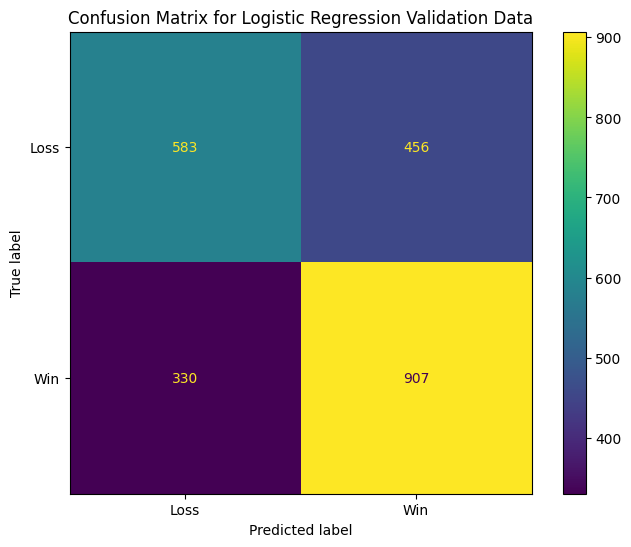

In [23]:
conf_matrix = confusion_matrix(y_val, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss","Win"])
fig, ax = plt.subplots(figsize=(8, 6))  # You can specify the size of the figure here
cm_display.plot(ax=ax)

ax.set_title("Confusion Matrix for Logistic Regression Validation Data")

plt.savefig("lrv_confusion_matrix.pdf", format='pdf')

plt.show()

Next, the model is evaluated on test data.

In [24]:
# Predict on the test set
y_pred = lr.predict(test_df["Stemmed"])
y_test = test_df["Result_Bin"]
# Calculate F1
f1 = f1_score(y_test, y_pred)
print("F1 Score:", round(f1,3))
# Calculate Precision
precision = precision_score(y_test, y_pred)
print("Precision:", round(precision, 3))
# Calculate Recall
recall = recall_score(y_test, y_pred)
print("Recall:", round(recall, 3))

F1 Score: 0.703
Precision: 0.661
Recall: 0.749


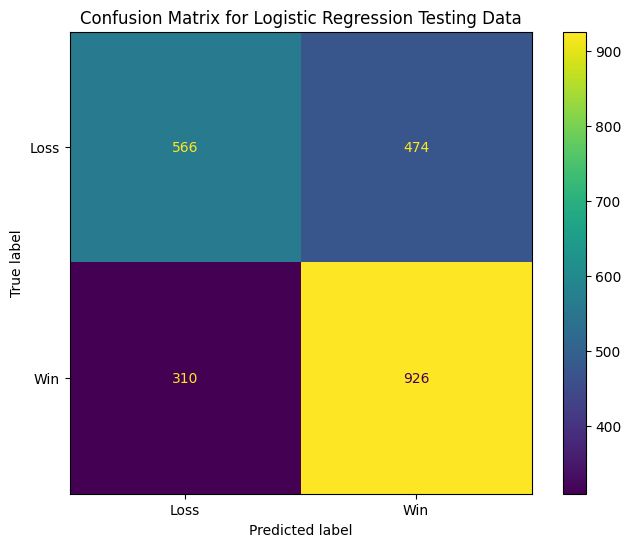

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels = ["Loss","Win"])
fig, ax = plt.subplots(figsize=(8, 6))  # You can specify the size of the figure here
cm_display.plot(ax=ax)

# Set the title
ax.set_title("Confusion Matrix for Logistic Regression Testing Data")

plt.savefig("lrt_confusion_matrix.pdf", format='pdf')

# Optionally show the plot in the notebook
plt.show()

In [26]:
results_copy = test_df.copy()
results_copy["Predicted_Result"] = y_pred
results_copy["Predicted_Probability"] = lr.predict_proba(test_df["Stemmed"])[:, 1]
results_copy.to_csv("lr_results.csv")